In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key
print(api_key)

4cb17eac2552e845a37849a090acb3c3


In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [8]:
# Get latitude and temperature for cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei","kansas city"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478, 39.0997]
The temperature information received is: [17.74, 15.05, 2.66, 8.23, 28, 23.09, -0.04, 3.9, 3.08, 14.84, -1.86]


In [9]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,17.74
1,London,51.5085,15.05
2,Oslo,59.9127,2.66
3,Beijing,39.9075,8.23
4,Mumbai,19.0144,28.00
5,Manila,14.6042,23.09
6,New York,40.7143,-0.04
7,Seattle,47.6062,3.90
8,Dallas,32.7668,3.08
9,Taipei,25.0478,14.84


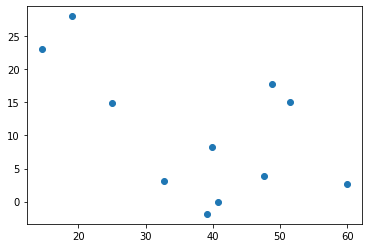

In [10]:
# Create a Scatter Plot for temperature vs. latitude
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")


In [18]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue,pvalue,stderr) = stats.linregress(weather_data["lat"],weather_data["temp"])

# Get regression values
regress_values =  weather_data["lat"] *slope + intercept
regress_values

0      6.173149
1      5.123569
2      1.801328
3      9.709528
4     17.968721
5     19.712105
6      9.390594
7      6.666176
8     12.532298
9     15.583675
10    10.028857
Name: lat, dtype: float64

In [19]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq

'y = -0.4x +25.49'

r-value 0.3151197550371526


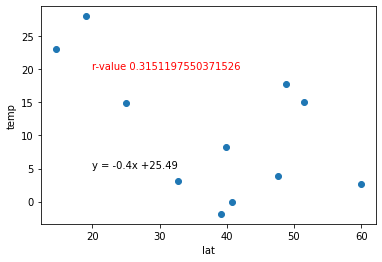

In [34]:
# Create Plot
plt.scatter(weather_data["lat"], weather_data["temp"])

# Label plot and annotate the line equation
plt.xlabel("lat")
plt.ylabel("temp")
plt.annotate(line_eq, (20,5) )
plt.annotate(f'r-value {rvalue **2}', (20,20),color="red" )
# Print r square value
print(f'r-value {rvalue**2 }')


# Show plot


In [36]:
# Use the line equation to predict the temperature for Florence at a latitude of 43.77 degrees
florence_lat = 43.77
florence_prediction =round(slope * florence_lat + intercept,2 )
florence_prediction

8.18

In [ ]:
# Use API to determine actual temperature


In [38]:
response = requests.get(query_url + 'Florence').json()
response['main']['temp']

15.59